# Toxic comment classification 

## Importing the libraries and loading the data

In [79]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Model,Sequential
from keras.layers import Dense,Embedding, Input , Activation
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import initializers, optimizers, layers
from sklearn.metrics import  roc_auc_score
from sklearn.compose import make_column_transformer


In [86]:
#Loading the Train_test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [87]:
train.iloc[12]['comment_text']

'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...'

In [88]:
#Listing down the Classes
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

y = train[list_classes].values

In [89]:
#Train and test labels
list_sequences_train = train["comment_text"]
list_sequences_test = test["comment_text"]

max_features = 22000
tokenizer = Tokenizer(num_words=max_features)
train = tokenizer.fit_on_texts(list(list_sequences_train))


In [90]:
#Tokenizing and Indexing the comments
list_tokenized_train = tokenizer.texts_to_sequences(list_sequences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sequences_test)

#Defining the train and test sequences
#200 is the maximum length of the inut stream. Samll sentence =0, long sentences will be trimmed
maxlen = 200
X_train = pad_sequences(list_tokenized_train, maxlen = maxlen)
X_test = pad_sequences(list_tokenized_test, maxlen = maxlen)

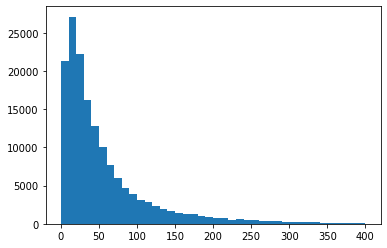

In [91]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

#Visualizing the Distribution of the words
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()


# Lets create the cnn and rnn models and check their validation and training accuries

In [92]:
#Step1: Adding the first Input Layer (None,200)
inp = Input(shape=(maxlen, ))

In [105]:
#Step2: Adding the embedding Layer (None,200,128)
#128 is a tunable params(Creating Word Embeddings)
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

#Step3: Defining the LSTM Layer with 60 Output
x = LSTM(60, return_sequences=True, name='lstm_layer')(x)

#Step4: Global Max Pooling Layer to convert 3D tensor into 2D
x = GlobalMaxPooling1D()(x)

#Step5: Adding a Dropout Reguralisation
x = Dropout(0.1)(x)

#Step6: Adding a Dense Layer
x = Dense(50, activation = 'relu')(x)

x = Dropout(0.1)(x)

#Step7: Final Output Layer
x = Dense(6, activation="sigmoid")(x)


model1=Model(inputs=inp, outputs = x)

model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

batch_size = 32
epochs = 10

In [106]:
model1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 200, 128)          2816000   
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           45360     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 60)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_8 (Dropout)         (None, 60)                0         
                                                                 
 dense_22 (Dense)            (None, 50)                3050      
                                                           

In [107]:
history1 = model1.fit(X_train, y, batch_size = batch_size, epochs = 7, validation_split=0.1,verbose=2)

Epoch 1/7
4488/4488 - 52s - loss: 0.0672 - accuracy: 0.9599 - val_loss: 0.0490 - val_accuracy: 0.9940 - 52s/epoch - 12ms/step
Epoch 2/7
4488/4488 - 49s - loss: 0.0456 - accuracy: 0.9922 - val_loss: 0.0475 - val_accuracy: 0.9933 - 49s/epoch - 11ms/step
Epoch 3/7
4488/4488 - 48s - loss: 0.0402 - accuracy: 0.9865 - val_loss: 0.0474 - val_accuracy: 0.9931 - 48s/epoch - 11ms/step
Epoch 4/7
4488/4488 - 49s - loss: 0.0353 - accuracy: 0.9570 - val_loss: 0.0490 - val_accuracy: 0.9932 - 49s/epoch - 11ms/step
Epoch 5/7
4488/4488 - 53s - loss: 0.0309 - accuracy: 0.8723 - val_loss: 0.0524 - val_accuracy: 0.9737 - 53s/epoch - 12ms/step
Epoch 6/7
4488/4488 - 58s - loss: 0.0273 - accuracy: 0.8051 - val_loss: 0.0545 - val_accuracy: 0.8904 - 58s/epoch - 13ms/step
Epoch 7/7
4488/4488 - 48s - loss: 0.0238 - accuracy: 0.6700 - val_loss: 0.0626 - val_accuracy: 0.5033 - 48s/epoch - 11ms/step


In [108]:
history1.history

{'loss': [0.06724943965673447,
  0.045592132955789566,
  0.040171679109334946,
  0.03534392639994621,
  0.030895035713911057,
  0.027294564992189407,
  0.023832356557250023],
 'accuracy': [0.9598782658576965,
  0.9922012686729431,
  0.9865332245826721,
  0.9569815993309021,
  0.872344434261322,
  0.8050733804702759,
  0.6699532866477966],
 'val_loss': [0.049017347395420074,
  0.047517385333776474,
  0.04735197871923447,
  0.04902855306863785,
  0.0523986853659153,
  0.05448704585433006,
  0.06257153302431107],
 'val_accuracy': [0.9939842224121094,
  0.993294894695282,
  0.9931069016456604,
  0.9931695461273193,
  0.9737435579299927,
  0.8903998136520386,
  0.5033212304115295]}

<Figure size 576x360 with 0 Axes>

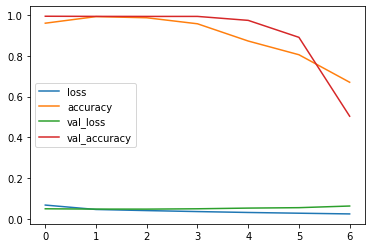

In [109]:
plt.figure(figsize=(8,5))
pd.DataFrame(history1.history).plot()
plt.show()

In [100]:
#Step2: Adding the embedding Layer (None,200,128)
#128 is a tunable params(Creating Word Embeddings)
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

#Step3: Defining the LSTM Layer with 60 Output
x = LSTM(60, return_sequences=True, name='lstm_layer')(x)

#Step4: Global Max Pooling Layer to convert 3D tensor into 2D
x = GlobalMaxPooling1D()(x)

#Step5: Adding a Dropout Reguralisation
x = Dropout(0.2)(x)



#Step6: Adding a Dense Layer
x = Dense(128,activation = 'relu') (x)
x = Dense(256,activation = 'relu') (x)
x = Dense(128,activation = 'relu') (x)

x = Dropout(0.1)(x)

#Step7: Final Output Layer
x = Dense(6, activation="sigmoid")(x)


model2=Model(inputs=inp, outputs = x)

model2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

batch_size = 32
epochs = 10

In [101]:
history2 = model2.fit(X_train, y, batch_size = batch_size, epochs = epochs, validation_split=0.1)


Epoch 1/10
4488/4488 [==============================] - 63s 14ms/step - loss: 0.0623 - accuracy: 0.9612 - val_loss: 0.0497 - val_accuracy: 0.9939
Epoch 2/10
4488/4488 [==============================] - 54s 12ms/step - loss: 0.0448 - accuracy: 0.9916 - val_loss: 0.0482 - val_accuracy: 0.9940
Epoch 3/10
4488/4488 [==============================] - 55s 12ms/step - loss: 0.0388 - accuracy: 0.9918 - val_loss: 0.0479 - val_accuracy: 0.9940
Epoch 4/10
4488/4488 [==============================] - 55s 12ms/step - loss: 0.0344 - accuracy: 0.9891 - val_loss: 0.0509 - val_accuracy: 0.9940
Epoch 5/10
4488/4488 [==============================] - 54s 12ms/step - loss: 0.0306 - accuracy: 0.9874 - val_loss: 0.0529 - val_accuracy: 0.9940
Epoch 6/10
4488/4488 [==============================] - 55s 12ms/step - loss: 0.0276 - accuracy: 0.9542 - val_loss: 0.0573 - val_accuracy: 0.9924
Epoch 7/10
4488/4488 [==============================] - 54s 12ms/step - loss: 0.0250 - accuracy: 0.9544 - val_loss: 0.0640 -

<Figure size 576x360 with 0 Axes>

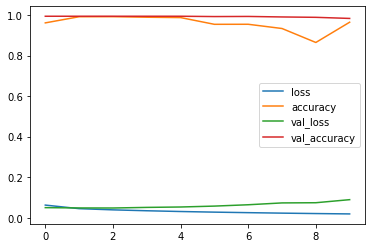

In [102]:
plt.figure(figsize=(8,5))
pd.DataFrame(history2.history).plot()
plt.show()

In [103]:
model2.save("lstmmodel2.h5")

In [129]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D

model3 = Sequential()
model3.add(Embedding(max_features, embed_size))
model3.add(Dropout(0.2))


model3.add(Conv1D(150, 3, activation = 'relu'))
model3.add(MaxPooling1D())
model3.add(Conv1D(150, 3, activation = 'relu'))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(150, activation = 'relu'))
model3.add(Dense(300, activation = 'relu'))
model3.add(Dense(150, activation = 'relu'))
model3.add(Dropout(0.2))

model3.add(Dense(6, activation = 'sigmoid'))

# Display the model structure
model3.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 128)         2816000   
                                                                 
 dropout_14 (Dropout)        (None, None, 128)         0         
                                                                 
 conv1d_6 (Conv1D)           (None, None, 150)         57750     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 150)        0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, None, 150)         67650     
                                                                 
 global_max_pooling1d_7 (Glo  (None, 150)              0         
 balMaxPooling1D)                                     

In [130]:
history3 = model3.fit(X_train, y, batch_size = 32, epochs = 10, validation_split=0.1)


Epoch 1/10
4488/4488 [==============================] - 34s 7ms/step - loss: 0.0634 - accuracy: 0.9646 - val_loss: 0.0537 - val_accuracy: 0.9940
Epoch 2/10
4488/4488 [==============================] - 32s 7ms/step - loss: 0.0465 - accuracy: 0.9936 - val_loss: 0.0522 - val_accuracy: 0.9940
Epoch 3/10
4488/4488 [==============================] - 31s 7ms/step - loss: 0.0406 - accuracy: 0.9899 - val_loss: 0.0522 - val_accuracy: 0.9939
Epoch 4/10
4488/4488 [==============================] - 31s 7ms/step - loss: 0.0358 - accuracy: 0.9933 - val_loss: 0.0554 - val_accuracy: 0.9940
Epoch 5/10
4488/4488 [==============================] - 31s 7ms/step - loss: 0.0320 - accuracy: 0.9923 - val_loss: 0.0685 - val_accuracy: 0.9927
Epoch 6/10
4488/4488 [==============================] - 31s 7ms/step - loss: 0.0291 - accuracy: 0.9883 - val_loss: 0.0743 - val_accuracy: 0.9939
Epoch 7/10
4488/4488 [==============================] - 31s 7ms/step - loss: 0.0272 - accuracy: 0.9865 - val_loss: 0.0607 - val_ac

<Figure size 576x360 with 0 Axes>

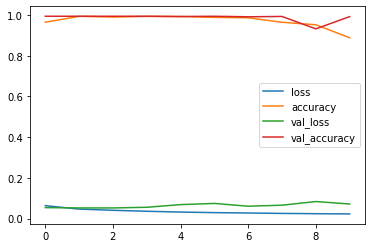

In [132]:
plt.figure(figsize=(8,5))
pd.DataFrame(history3.history).plot()
plt.show()

# Lets create the same models but applying the early stopping because we can see that we are getting better accuries with these models itself only problem is the accuracy is getting dipped down and grow after while which is the signal of the overfitting of the model

In [135]:
from keras.callbacks import EarlyStopping , ModelCheckpoint


In [136]:
, ModelCheckpoint
#Step2: Adding the embedding Layer (None,200,128)
#128 is a tunable params(Creating Word Embeddings)
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

#Step3: Defining the LSTM Layer with 60 Output
x = LSTM(60, return_sequences=True, name='lstm_layer')(x)

#Step4: Global Max Pooling Layer to convert 3D tensor into 2D
x = GlobalMaxPooling1D()(x)

#Step5: Adding a Dropout Reguralisation
x = Dropout(0.2)(x)



#Step6: Adding a Dense Layer
x = Dense(128,activation = 'relu') (x)
x = Dense(256,activation = 'relu') (x)
x = Dense(128,activation = 'relu') (x)

x = Dropout(0.1)(x)

#Step7: Final Output Layer
x = Dense(6, activation="sigmoid")(x)


model2=Model(inputs=inp, outputs = x)

model2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

es = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    verbose = 1,
    mode = min
)

mc = ModelCheckpoint(
    'lstm_model1.h5',
    monitor = 'val_accuracy',
    verbose = 1,
    save_best_only = True
)


batch_size = 32
epochs = 10

history2 = model2.fit(X_train, y, batch_size = batch_size, epochs = epochs, validation_split=0.1,callbacks = [es,mc],verbose=1)


Epoch 1/10
4484/4488 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9580
Epoch 1: val_accuracy improved from -inf to 0.29929, saving model to lstm_model1.h5
4488/4488 [==============================] - 55s 12ms/step - loss: 0.0174 - accuracy: 0.9575 - val_loss: 0.0801 - val_accuracy: 0.2993
Epoch 2/10
4487/4488 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.8032
Epoch 2: val_accuracy improved from 0.29929 to 0.97500, saving model to lstm_model1.h5
4488/4488 [==============================] - 56s 12ms/step - loss: 0.0160 - accuracy: 0.8033 - val_loss: 0.0844 - val_accuracy: 0.9750
Epoch 3/10
4486/4488 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.9021
Epoch 3: val_accuracy improved from 0.97500 to 0.98352, saving model to lstm_model1.h5
4488/4488 [==============================] - 55s 12ms/step - loss: 0.0148 - accuracy: 0.9022 - val_loss: 0.0960 - val_accuracy: 0.9835
Epoch 4/10
4486/4488 [=====================

<Figure size 576x360 with 0 Axes>

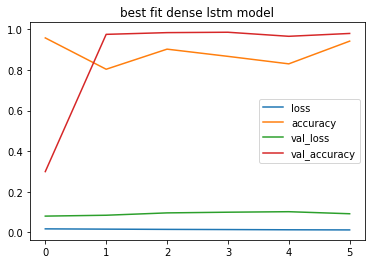

In [144]:
plt.figure(figsize=(8,5))
pd.DataFrame(history2.history).plot()
plt.title("best fit dense lstm model")
plt.show()

In [140]:

#Step2: Adding the embedding Layer (None,200,128)
#128 is a tunable params(Creating Word Embeddings)

embed_size = 128
x = Embedding(max_features, embed_size)(inp)

#Step3: Defining the LSTM Layer with 60 Output
x = LSTM(60, return_sequences=True, name='lstm_layer')(x)

#Step4: Global Max Pooling Layer to convert 3D tensor into 2D
x = GlobalMaxPooling1D()(x)

#Step5: Adding a Dropout Reguralisation
x = Dropout(0.1)(x)

#Step6: Adding a Dense Layer
x = Dense(50, activation = 'relu')(x)

x = Dropout(0.1)(x)

#Step7: Final Output Layer
x = Dense(6, activation="sigmoid")(x)


model1=Model(inputs=inp, outputs = x)

model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])


es = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    verbose = 1,
    mode = min
)

mc = ModelCheckpoint(
    'lstm_model2.h5',
    monitor = 'val_accuracy',
    verbose = 1,
    save_best_only = True
)


batch_size = 32
epochs = 10

history1 = model1.fit(X_train, y, batch_size = batch_size, epochs = epochs, validation_split=0.1,callbacks = [es,mc],verbose=1)


Epoch 1/10
4485/4488 [============================>.] - ETA: 0s - loss: 0.0703 - accuracy: 0.9404
Epoch 1: val_accuracy improved from -inf to 0.99398, saving model to lstm_model2.h5
4488/4488 [==============================] - 82s 13ms/step - loss: 0.0703 - accuracy: 0.9404 - val_loss: 0.0496 - val_accuracy: 0.9940
Epoch 2/10
4484/4488 [============================>.] - ETA: 0s - loss: 0.0446 - accuracy: 0.9846
Epoch 2: val_accuracy did not improve from 0.99398
4488/4488 [==============================] - 55s 12ms/step - loss: 0.0446 - accuracy: 0.9846 - val_loss: 0.0466 - val_accuracy: 0.9940
Epoch 3/10
4486/4488 [============================>.] - ETA: 0s - loss: 0.0389 - accuracy: 0.9728
Epoch 3: val_accuracy did not improve from 0.99398
4488/4488 [==============================] - 54s 12ms/step - loss: 0.0389 - accuracy: 0.9728 - val_loss: 0.0472 - val_accuracy: 0.9926
Epoch 4/10
4484/4488 [============================>.] - ETA: 0s - loss: 0.0341 - accuracy: 0.9213
Epoch 4: val_accu

In [141]:
model3 = Sequential()
model3.add(Embedding(max_features, embed_size))
model3.add(Dropout(0.2))


model3.add(Conv1D(150, 3, activation = 'relu'))
model3.add(MaxPooling1D())
model3.add(Conv1D(150, 3, activation = 'relu'))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(150, activation = 'relu'))
model3.add(Dense(300, activation = 'relu'))
model3.add(Dense(150, activation = 'relu'))
model3.add(Dropout(0.2))

model3.add(Dense(6, activation = 'sigmoid'))

# Display the model structure
model3.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
es = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    verbose = 1,
    mode = min
)

mc = ModelCheckpoint(
    'cnn_model.h5',
    monitor = 'val_accuracy',
    verbose = 1,
    save_best_only = True
)


batch_size = 32
epochs = 10

history3 = model3.fit(X_train, y, batch_size = batch_size, epochs = epochs, validation_split=0.1,callbacks = [es,mc],verbose=1)


Epoch 1/10
4481/4488 [============================>.] - ETA: 0s - loss: 0.0636 - accuracy: 0.9644
Epoch 1: val_accuracy improved from -inf to 0.99398, saving model to cnn_model.h5
4488/4488 [==============================] - 32s 7ms/step - loss: 0.0636 - accuracy: 0.9644 - val_loss: 0.0515 - val_accuracy: 0.9940
Epoch 2/10
4488/4488 [==============================] - ETA: 0s - loss: 0.0464 - accuracy: 0.9922
Epoch 2: val_accuracy did not improve from 0.99398
4488/4488 [==============================] - 31s 7ms/step - loss: 0.0464 - accuracy: 0.9922 - val_loss: 0.0504 - val_accuracy: 0.9940
Epoch 3/10
4485/4488 [============================>.] - ETA: 0s - loss: 0.0405 - accuracy: 0.9858
Epoch 3: val_accuracy did not improve from 0.99398
4488/4488 [==============================] - 30s 7ms/step - loss: 0.0405 - accuracy: 0.9858 - val_loss: 0.0518 - val_accuracy: 0.9934
Epoch 4/10
4484/4488 [============================>.] - ETA: 0s - loss: 0.0357 - accuracy: 0.9913
Epoch 4: val_accuracy 

<Figure size 576x360 with 0 Axes>

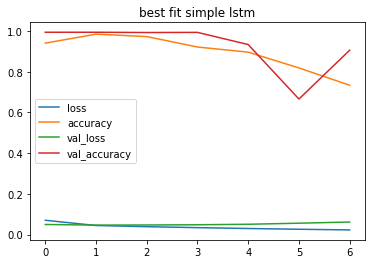

In [142]:
plt.figure(figsize=(8,5))
pd.DataFrame(history1.history).plot()
plt.title("best fit simple lstm")
plt.show()

<Figure size 576x360 with 0 Axes>

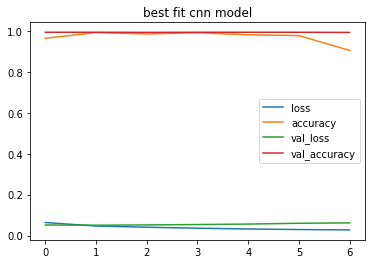

In [143]:
plt.figure(figsize=(8,5))
pd.DataFrame(history3.history).plot()
plt.title("best fit cnn model")
plt.show()

# The best model among all three is cnn model so we will take the cnn model as the final model for this project.

In [156]:
max_features = 22000
tokenizer = Tokenizer(num_words=max_features)
train = tokenizer.fit_on_texts(list(list_sequences_train))
#Tokenizing and Indexing the comments
list_tokenized_train = tokenizer.texts_to_sequences(list_sequences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sequences_test)

#Defining the train and test sequences
#200 is the maximum length of the inut stream. Samll sentence =0, long sentences will be trimmed
maxlen = 200
X_train = pad_sequences(list_tokenized_train, maxlen = maxlen)
X_test = pad_sequences(list_tokenized_test, maxlen = maxlen)

# Test and Gardio app creation

In [158]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 830 kB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 106 kB 80.5 MB/s 
     |████████████████████████████████| 84 kB 4.7 MB/s 
     |████████████████████████████████| 213 kB 85.2 MB/s 
     |████████████████████████████████| 55 kB 4.6 MB/s 
     |████████████████████████████████| 2.3 MB 32.8 MB/s 
     |████████████████████████████████| 278 kB 77.3 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 64 kB 3.4 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 68 kB 9.5 MB/s 
     |████████████████████████████████| 68 kB 7.4 MB/s 
     |████████████████████████████████| 68 kB 8.5 MB/s 
     |████████████████████████████████| 68 kB 8.5 M

In [159]:
import gradio as gr

In [167]:
import tensorflow as tf
model = tf.keras.models.load_model('toxic_comment_classification.h5')

OSError: ignored

In [173]:
model = tf.keras.models.load_model('toxic_comment_classification.h5')

In [174]:
input_str = vectorizer('bitch')

In [175]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 663ms/step


In [176]:
res

array([[5.7944655e-04, 2.1199267e-10, 2.4707344e-06, 1.0530927e-07,
        3.2781340e-06, 4.6429528e-07]], dtype=float32)

In [168]:
input_text = vectorizer("You freaking suck!")

In [164]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx,col in enumerate(df.columns[2:]):
        text +='{}:{}\n'.format(col,results[0][idx]>0.5)
    return text

In [177]:
(model.predict(np.expand_dims(input_text,0 )) >0.5).astype(int)

1/1 [==============================] - 0s 61ms/step


array([[0, 0, 0, 0, 0, 0]])

In [165]:
interface = gr.Interface(fn = score_comment,
                        inputs = gr.inputs.Textbox(lines=2,placeholder = 'comment to score'),outputs = 'text')

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [166]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://709c88e379e16417.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
